In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df=pd.read_csv(f'/content/Health_Sleep_Statistics.csv')
df.head()


,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [ ]:
df.size

1200

In [ ]:
df.columns.size


12

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [ ]:
df.describe() #

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [ ]:
df.isna().sum() #uysed for checking null

,0
User ID,0
Age,0
Gender,0
Sleep Quality,0
Bedtime,0
Wake-up Time,0
Daily Steps,0
Calories Burned,0
Physical Activity Level,0
Dietary Habits,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(['User ID'],axis=1,inplace=True)

KeyError: "['User ID'] not found in axis"

In [ ]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


**##Age vs Sleep**


In [ ]:
age_sleep_quality_corr=df[['Age','Sleep Quality']].corr()
age_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


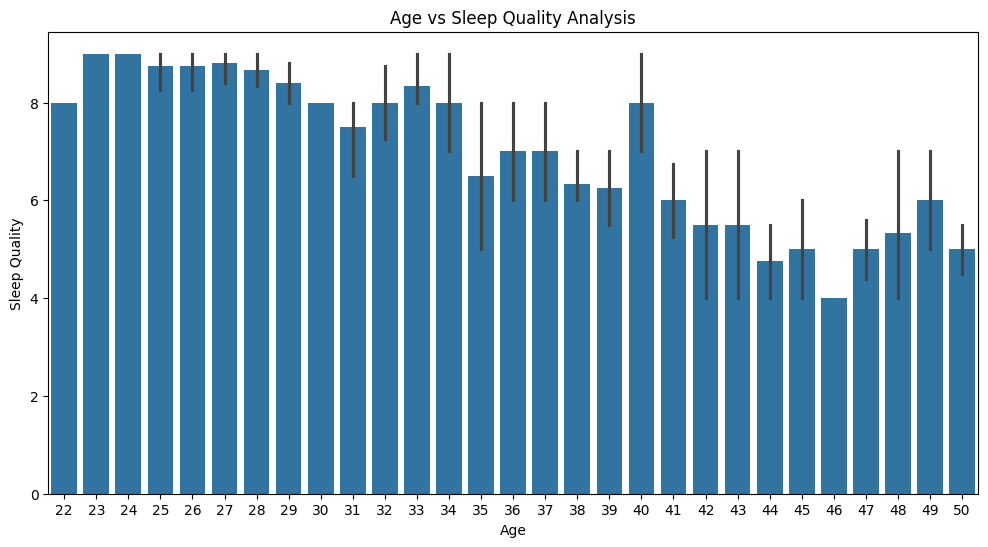

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Age',y='Sleep Quality',data=df)
plt.title("Age vs Sleep Quality Analysis")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
age_sleep_quality_model=LinearRegression()

x=df[['Age']]
y=df['Sleep Quality']

age_sleep_quality_model.fit(x,y)

LinearRegression()

In [ ]:
age_sleep_quality_model.intercept_

In [ ]:
age_sleep_quality_model.coef_

array([-0.17408531])

In [ ]:
age_sleep_quality_predictions=age_sleep_quality_model.predict(x)

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age',y='Sleep Quality',data=df,label='Actual Values')
plt.plot(x,age_sleep_quality_predictions,color='green',label='Predicted Values')
plt.legend()
plt.show()

**Physical Activity vs Sleep Quality**

In [ ]:
df['Physical Activity Level'].head()

,Physical Activity Level
0,medium
1,low
2,high
3,low
4,high


In [ ]:
df['Sleep Quality'].head()

,Sleep Quality
0,8
1,7
2,9
3,5
4,8


In [ ]:
df['Gender'].head()

,Gender
0,f
1,m
2,f
3,m
4,f


<Axes: xlabel='Gender', ylabel='Sleep Quality'>

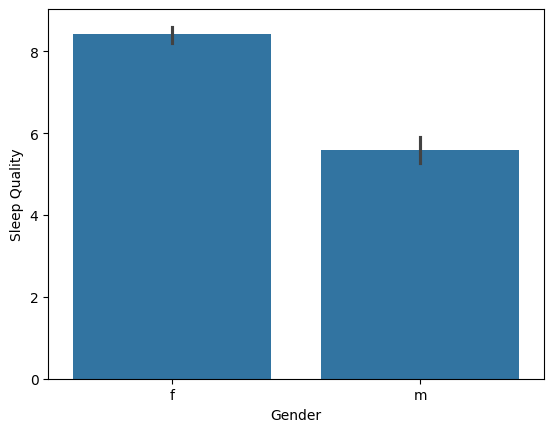

In [ ]:
sns.barplot(x="Gender",y="Sleep Quality",data=df)

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

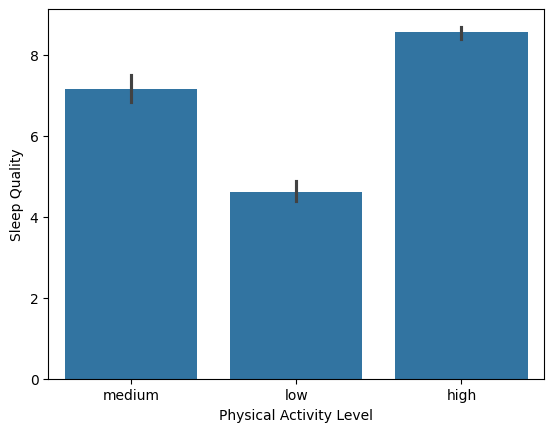

In [ ]:
sns.barplot(x="Physical Activity Level",y="Sleep Quality",data=df)

In [ ]:
custom_codes={'low':1,'medium':2,'high':3}

df['Physical Activity Level']=df['Physical Activity Level'].map(custom_codes)
df['Physical Activity Level'].head()

,Physical Activity Level
0,2
1,1
2,3
3,1
4,3


<Axes: xlabel='Gender', ylabel='Physical Activity Level'>

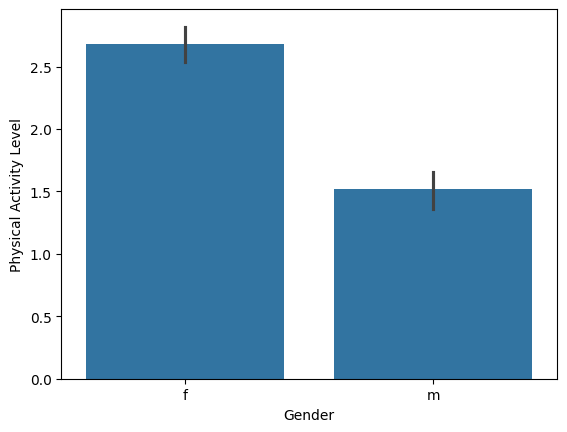

In [ ]:
sns.barplot(x='Gender',y='Physical Activity Level',data=df)

In [ ]:
from scipy import stats
sleep_quality_males=df[df['Gender']=='m']['Sleep Quality']
sleep_quality_females=df[df['Gender']=='f']['Sleep Quality']

physical_activity_males=df[df['Gender']=='m']['Physical Activity Level']
physical_activity_females=df[df['Gender']=='f']['Physical Activity Level']




In [ ]:
t_sleep_quality,p_sleep_quality = stats.ttest_ind(sleep_quality_males,sleep_quality_females)

print(f"t_stats value for Sleep Quality vs Gender:{t_sleep_quality:.2f}")
print(f"p_value value for Sleep Quality vs Gender:{p_sleep_quality:.2f}")


t_stats value for Sleep Quality vs Gender:-14.32
p_value value for Sleep Quality vs Gender:0.00


In [ ]:
t_physical_activity,p_physical_activity = stats.ttest_ind(physical_activity_males,physical_activity_females)

print(f"t_stats value for Physical Activity vs Gender:{t_physical_activity:.2f}")
print(f"p_value value for Physical Activity vs Gender:{p_physical_activity:.2f}")

t_stats value for Physical Activity vs Gender:-10.98
p_value value for Physical Activity vs Gender:0.00


 **Time of Sleep and waking up vs sleep quality**

In [ ]:
df['Bedtime'].head()

,Bedtime
0,23:00
1,00:30
2,22:45
3,01:00
4,23:30


In [ ]:
def sleep_duration_hours_helper_function(str_time):
    h = int(str_time.split(':')[0])
    m = int(str_time.split(':')[1])
    return h + m/60

df['Bedtime'] = df['Bedtime'].apply(sleep_duration_hours_helper_function)
df['Wake-up Time'] = df['Wake-up Time'].apply(sleep_duration_hours_helper_function)

df.head()


,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no


In [ ]:
df['Bedtime'].head()

,Bedtime
0,23.00
1,0.50
2,22.75
3,1.00
4,23.50


In [ ]:
df['Sleep Duration Hours']= (df['Wake-up Time'] - df['Bedtime']) % 24
df['Sleep Duration Hours'].head()

,Sleep Duration Hours
0,7.5
1,6.5
2,8.0
3,5.5
4,7.5


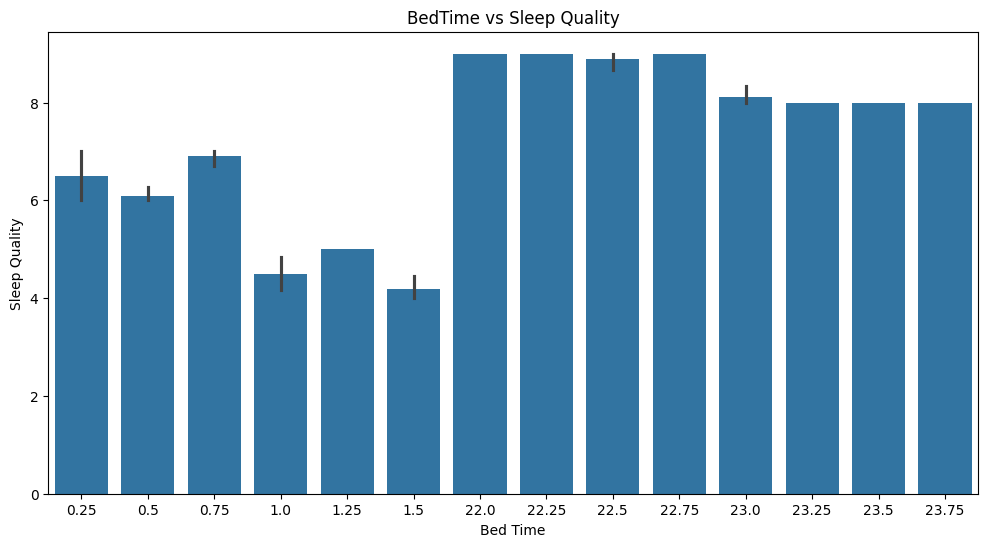

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Bedtime', y = 'Sleep Quality', data = df)
plt.xlabel("Bed Time")
plt.ylabel("Sleep Quality")
plt.title("BedTime vs Sleep Quality")
plt.show()

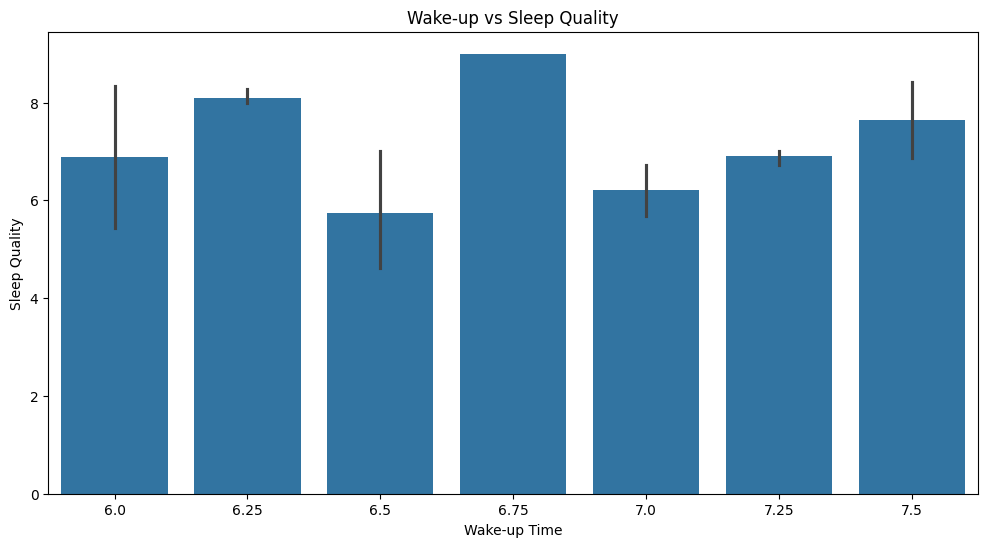

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Wake-up Time', y = 'Sleep Quality', data = df)
plt.xlabel("Wake-up Time")
plt.ylabel("Sleep Quality")
plt.title("Wake-up vs Sleep Quality")
plt.show()

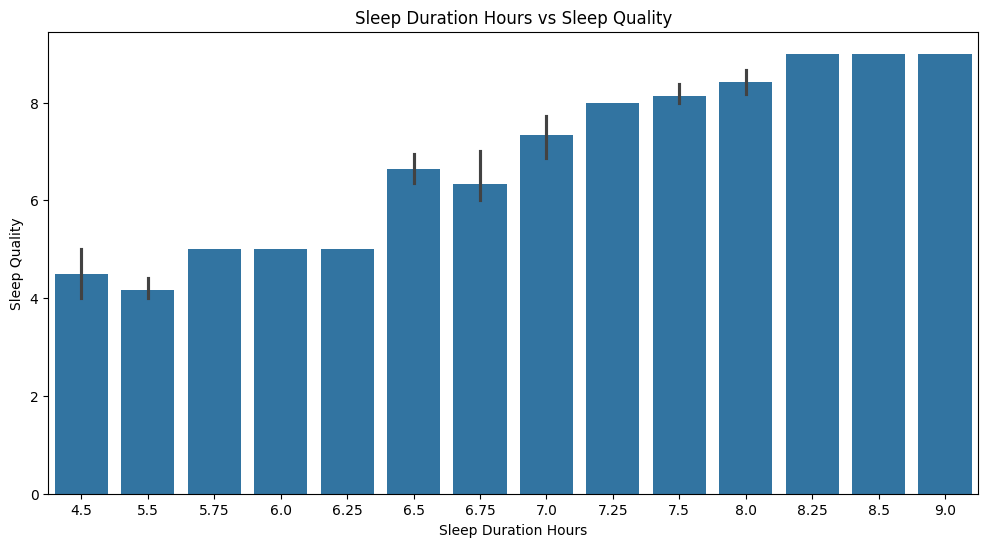

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df)
plt.xlabel("Sleep Duration Hours")
plt.ylabel("Sleep Quality")
plt.title("Sleep Duration Hours vs Sleep Quality")
plt.show()


In [ ]:
X = df[['Sleep Duration Hours']]
Y = df['Sleep Quality']

model = LinearRegression()

model.fit(X, Y)

LinearRegression()

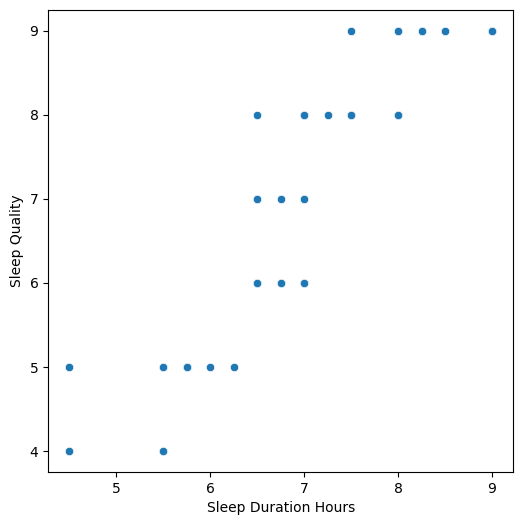

In [ ]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df)
plt.show()


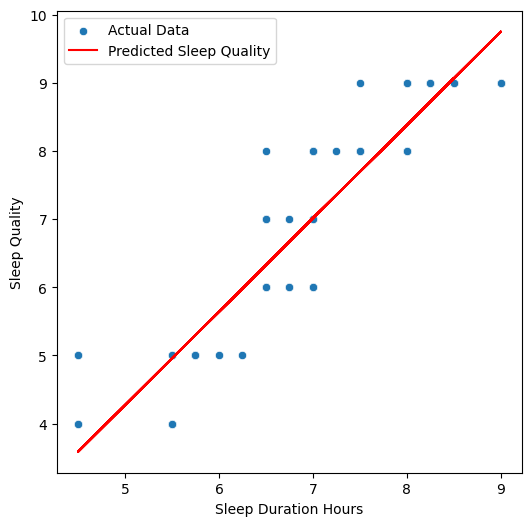

In [ ]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df, label = 'Actual Data')
plt.plot(X, model.predict(X), color = 'red', label = 'Predicted Sleep Quality')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y, model.predict(X))

0.8443929044393099

**Impact of Dietary Habits on Sleep Quality**

In [ ]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
unhealthy,41
medium,30
healthy,29


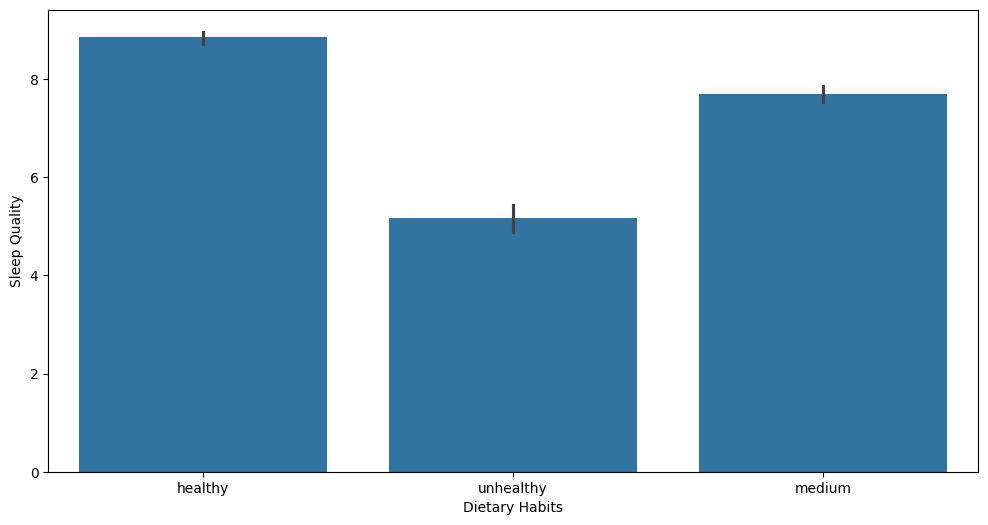

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Dietary Habits', y = 'Sleep Quality', data = df)
plt.show()


**Sleep Disorder Vs Sleep Quality**

In [ ]:
df['Sleep Disorders'].head()

,Sleep Disorders
0,no
1,yes
2,no
3,yes
4,no


In [ ]:
sleep_disorder_sleep_quality_summary = df.groupby('Sleep Disorders').agg({
    'Sleep Quality': ['mean', 'std'],
    'Physical Activity Level': lambda x: x.value_counts().to_dict()
})
print(sleep_disorder_sleep_quality_summary)

                Sleep Quality           Physical Activity Level
                         mean       std                <lambda>
Sleep Disorders                                                
no                   7.837838  1.085736          {2: 38, 3: 36}
yes                  4.615385  0.697247                 {1: 26}


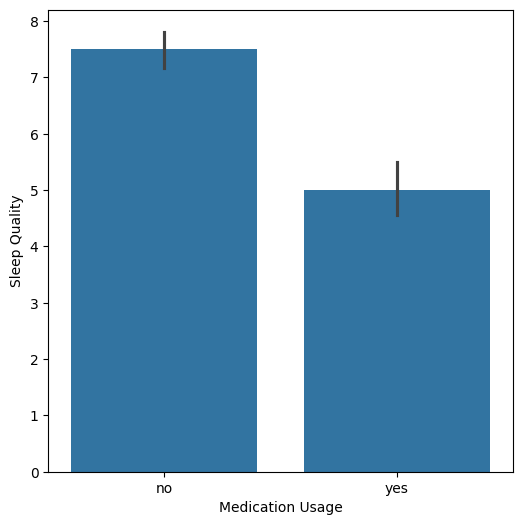

In [ ]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'Medication Usage', y = 'Sleep Quality', data = df)
plt.show()

In [ ]:
medication_quality = df[df['Medication Usage'] == 'yes']['Sleep Quality']
no_medication_quality = df[df['Medication Usage'] == 'no']['Sleep Quality']

t_statistic, p_value = stats.ttest_ind(medication_quality, no_medication_quality, equal_var=False)
print(f't-test Statistic for Sleep Quality: {t_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

t-test Statistic for Sleep Quality: -8.08
p-value: 0.0000


In [ ]:
df_numerics = df.select_dtypes(include = ['number'])
corr = df_numerics.corr()

print(corr['Sleep Quality'].sort_values(ascending=False))

Sleep Quality              1.000000
Daily Steps                0.976277
Calories Burned            0.973557
Sleep Duration Hours       0.918909
Physical Activity Level    0.875203
Bedtime                    0.853312
Wake-up Time              -0.048526
Age                       -0.848356
Name: Sleep Quality, dtype: float64


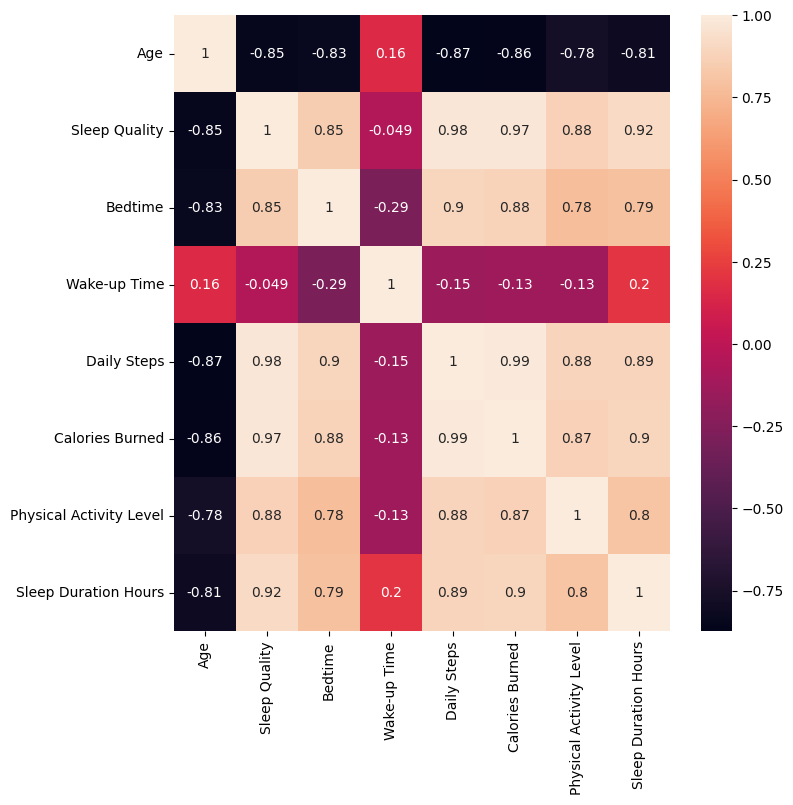

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')